# Short term variations

## Introduction

I present here some preliminary results aimed at finding short time scale absorption line variations (~ minutes) likely caused by fast moving excomets close to the star (a few stellar radii). I have chosen to look at the far-UV SiIV doublet at 1394 and 1403 Å, because the exocometary variatons are evident, and the S/N is high for these lines, compared to other lines in the spectra. My hypothesis is that the emission originates from exocomets close to the star where the conditions for highly ionising Si are met.

## Aim
The aim is to look for short term variations. For this, I look at data taken during a single visit. In order to become sensitive to variations on the order of tens of minutes I have to divide the data into datasets of shorter exposuretimes. Fortunately this data is already available from the pipeline in fhe form of sumN.fits files, where N is an integer. I have been working with the \*sum[1..4].fits files where the average(*sum1.fits, *sum2.fits, *sum3.fits, *sum4.fits) = *sum.fits. This has the advantage that we have 4 times the number of spectra for a given visit at the cost of ~1/4 the exposure time.

### Please note

The notebook will not work until you have made edits the follwoing edits to the ```params.json``` file:

```"filesnames" : {
     "split_files" : "yes",
     "filename_start"  : "l",     
     "filename_end"  : "sum.fits" 
     },```

```"BetaPictoris" : {
     "RV": 20.5,    
     "part": "A"
     },```

You have to run the **load_the_data** notebook first after updating the parameters above. You will also need to have created an exocomet free spectrum.

The dates which support spilt files are:  
    "2017_1": "data/2017-04-23/",  
    "2017_2": "data/2017-06-10/",  
    "2017_3": "data/2017-08-04/",  
    "2017_4": "data/2017-10-21/",
    "2017_5": "data/2017-11-26/",  
    "2018_1": "data/2018-03-17/",  
    "2018_2": "data/2018-05-09/",

### Load the data into a matrix of arrays

In [1]:
%matplotlib inline
import numpy as np
import json, sys, os

import matplotlib.pyplot as plt
from matplotlib import rc, cm

# get the path of the current directory
path = os.getcwd()
home = os.path.dirname(path)

# Print the repository home directory
print("Repository home directory:",home)

# Add the src folder to the system path
sys.path.append(home+'/src')

# Import the python functions from src
from calculations import Calc, Model, Stats

# We shorten the functions name to make it easier to call the required a functions
c   = Calc()
m   = Model()
s   = Stats()

# Importing parameters from a json file.
with open(home+'/params.json') as param_file:    
   param = json.load(param_file)

# We select part A which is the red end of the spectrum (the other part being B, which is the blue end)
part     = param["BetaPictoris"]["part"]

Repository home directory: /home/pas/science/exocomets


In [2]:
# The structure here is
# DP[visit][orbit][0 = wavelength, 1 = flux, 2 = one sigma uncertainty, 3 = datetime]
if param["filenames"]["split_files"] == "yes":
    DP   = c.LoadData(home+'/data/Dnsn_'+part+'_split.npz')
else:
    DP   = c.LoadData(home+'/data/Dnsn_'+part+'.npz')
    
ECF   = c.LoadData(home+'/data/ECF_'+part+'.npz')
ECF_err   = c.LoadData(home+'/data/ECF_'+part+'_err.npz')

spec   = c.LoadData(home+'/data/spec_'+part+'.npz')

Let's have a look at when the spectra were obtained

## Inspecting the data

We start off by making a plot which compares the observations done during each orbit to an exocomet free spectrum for the SiIV doublet.

In [3]:
# Setting the parameters for the plots
plotting_params = {'backend': 'wxAgg',
                   'font.family': 'serif',
                   'font.size': 22,
                   'lines.markersize' : 2,
                   'axes.labelsize': 22,
                   'legend.fontsize': 22,
                   'xtick.labelsize': 22,
                   'ytick.labelsize': 22,
                   'text.usetex': True}

plt.rcParams.update(plotting_params)

Text(0, 0.5, 'Flux [erg/s/cm$^2$/\\AA]')

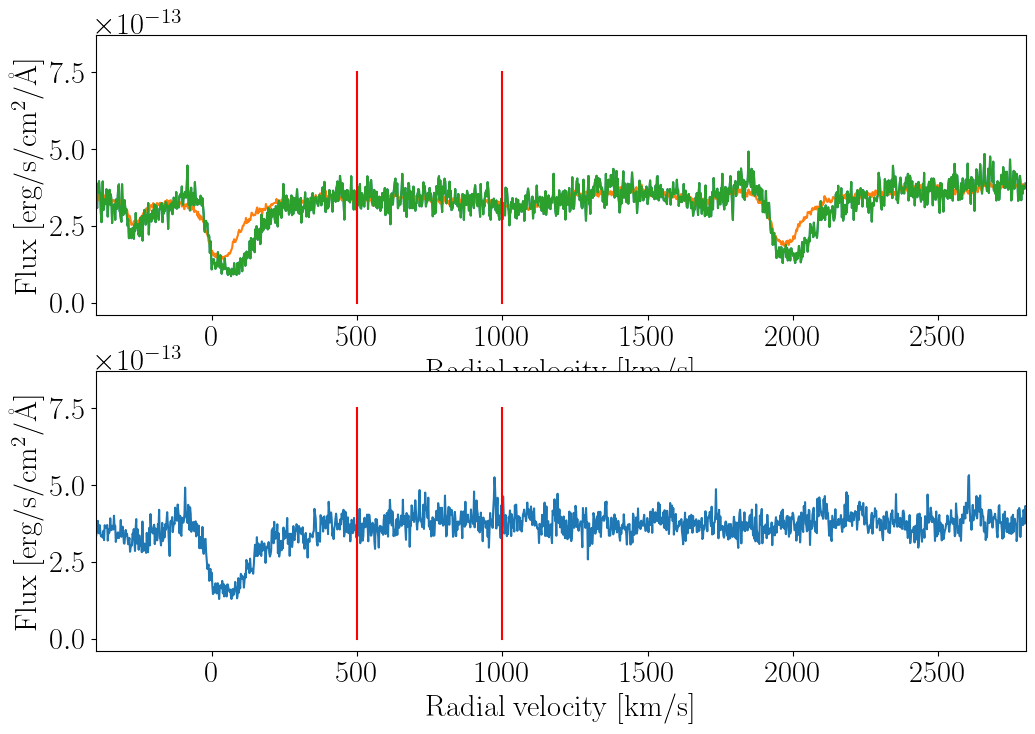

In [4]:
# Parameters to be put into params.json
Line1 = 1393.7550 # The first SiIV line
Line2 = 1402.7700 # The second SiIV line

# Selecting a region for determening the baseline (normalsation region).
n1 = 500  # km/s
n2 = 1000 # km/s

# Convert to RV space (using beta Pic RV of 20.5 km/s as reference)
fig = plt.figure(figsize=(12.0,8.0))
ax1 = plt.subplot(211)
rv = c.Wave2RV(DP[0][0][0],Line1,20.5)
plt.plot(rv,DP[0][0][1])
plt.plot(rv,ECF)
plt.plot(rv,spec[0])
plt.plot([n1,n1],[0,7.5e-13],'r')
plt.plot([n2,n2],[0,7.5e-13],'r')
plt.xlim(-400,2800)
plt.xlabel(r'Radial velocity [km/s]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')

ax1 = plt.subplot(212)
rv = c.Wave2RV(DP[0][0][0],Line2,20.5)
plt.plot(rv,DP[0][0][1])
plt.plot([n1,n1],[0,7.5e-13],'r')
plt.plot([n2,n2],[0,7.5e-13],'r')
plt.xlim(-400,2800)
plt.xlabel(r'Radial velocity [km/s]')
plt.ylabel(r'Flux [erg/s/cm$^2$/\AA]')


Looking at observations done on:

 2017-04-22

 2017-06-10

 2017-08-04

 2017-10-20

 2017-11-26

 2018-03-17

 2018-05-09


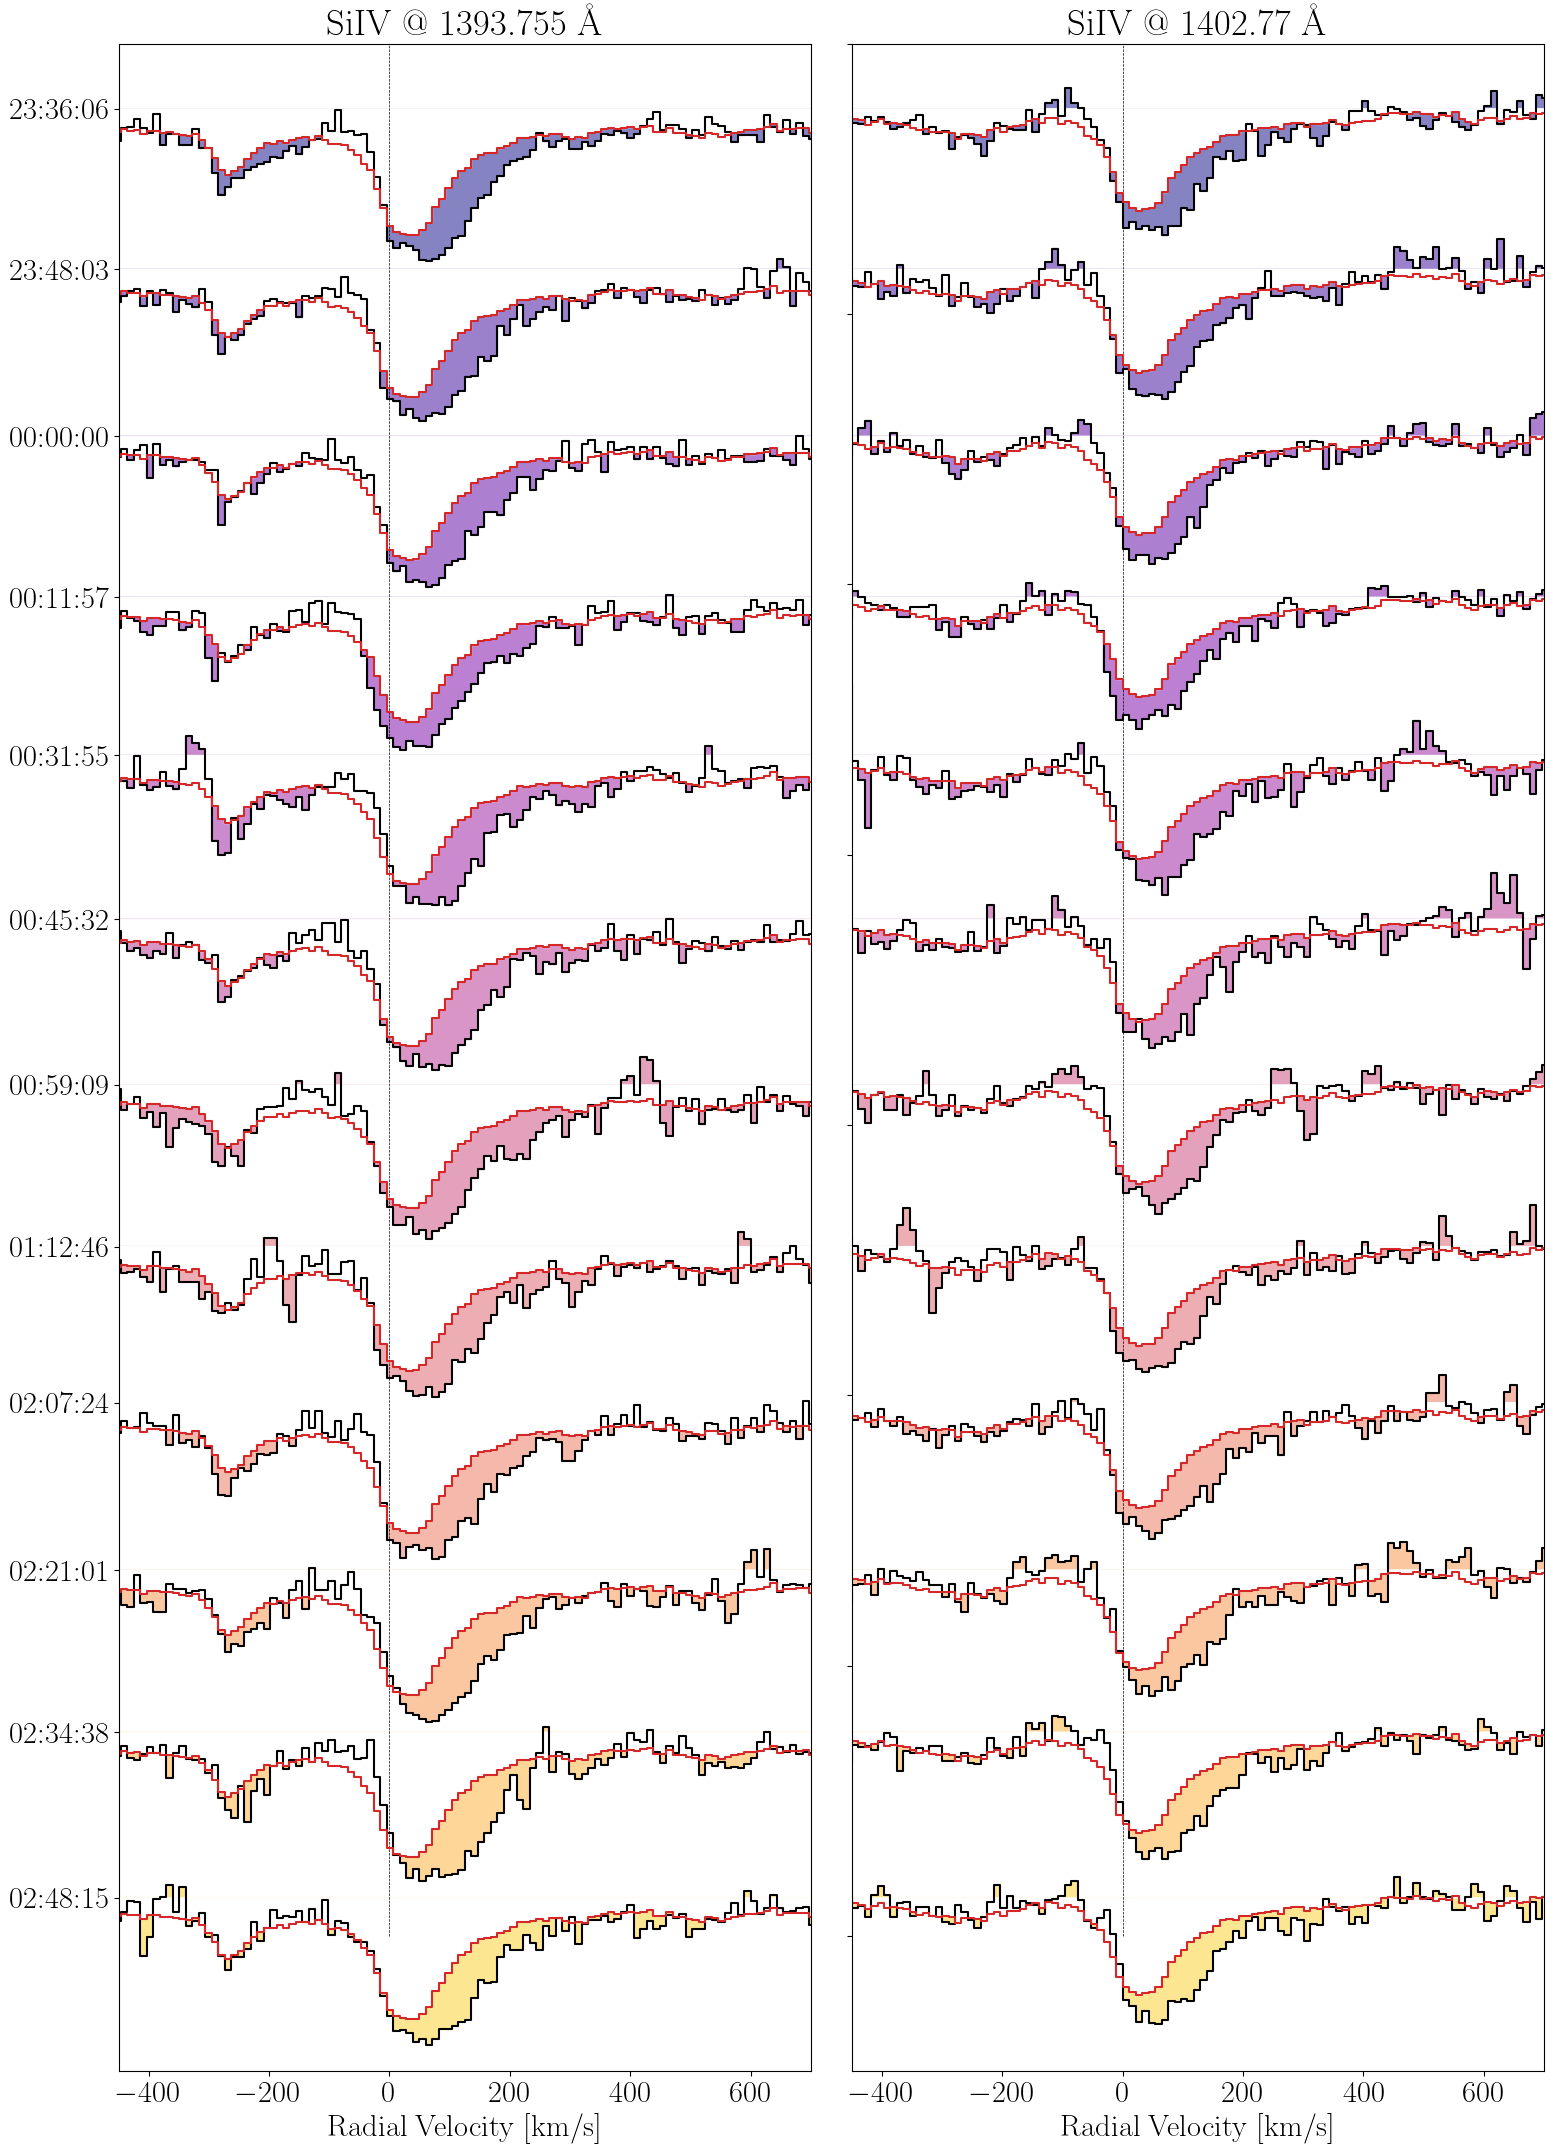

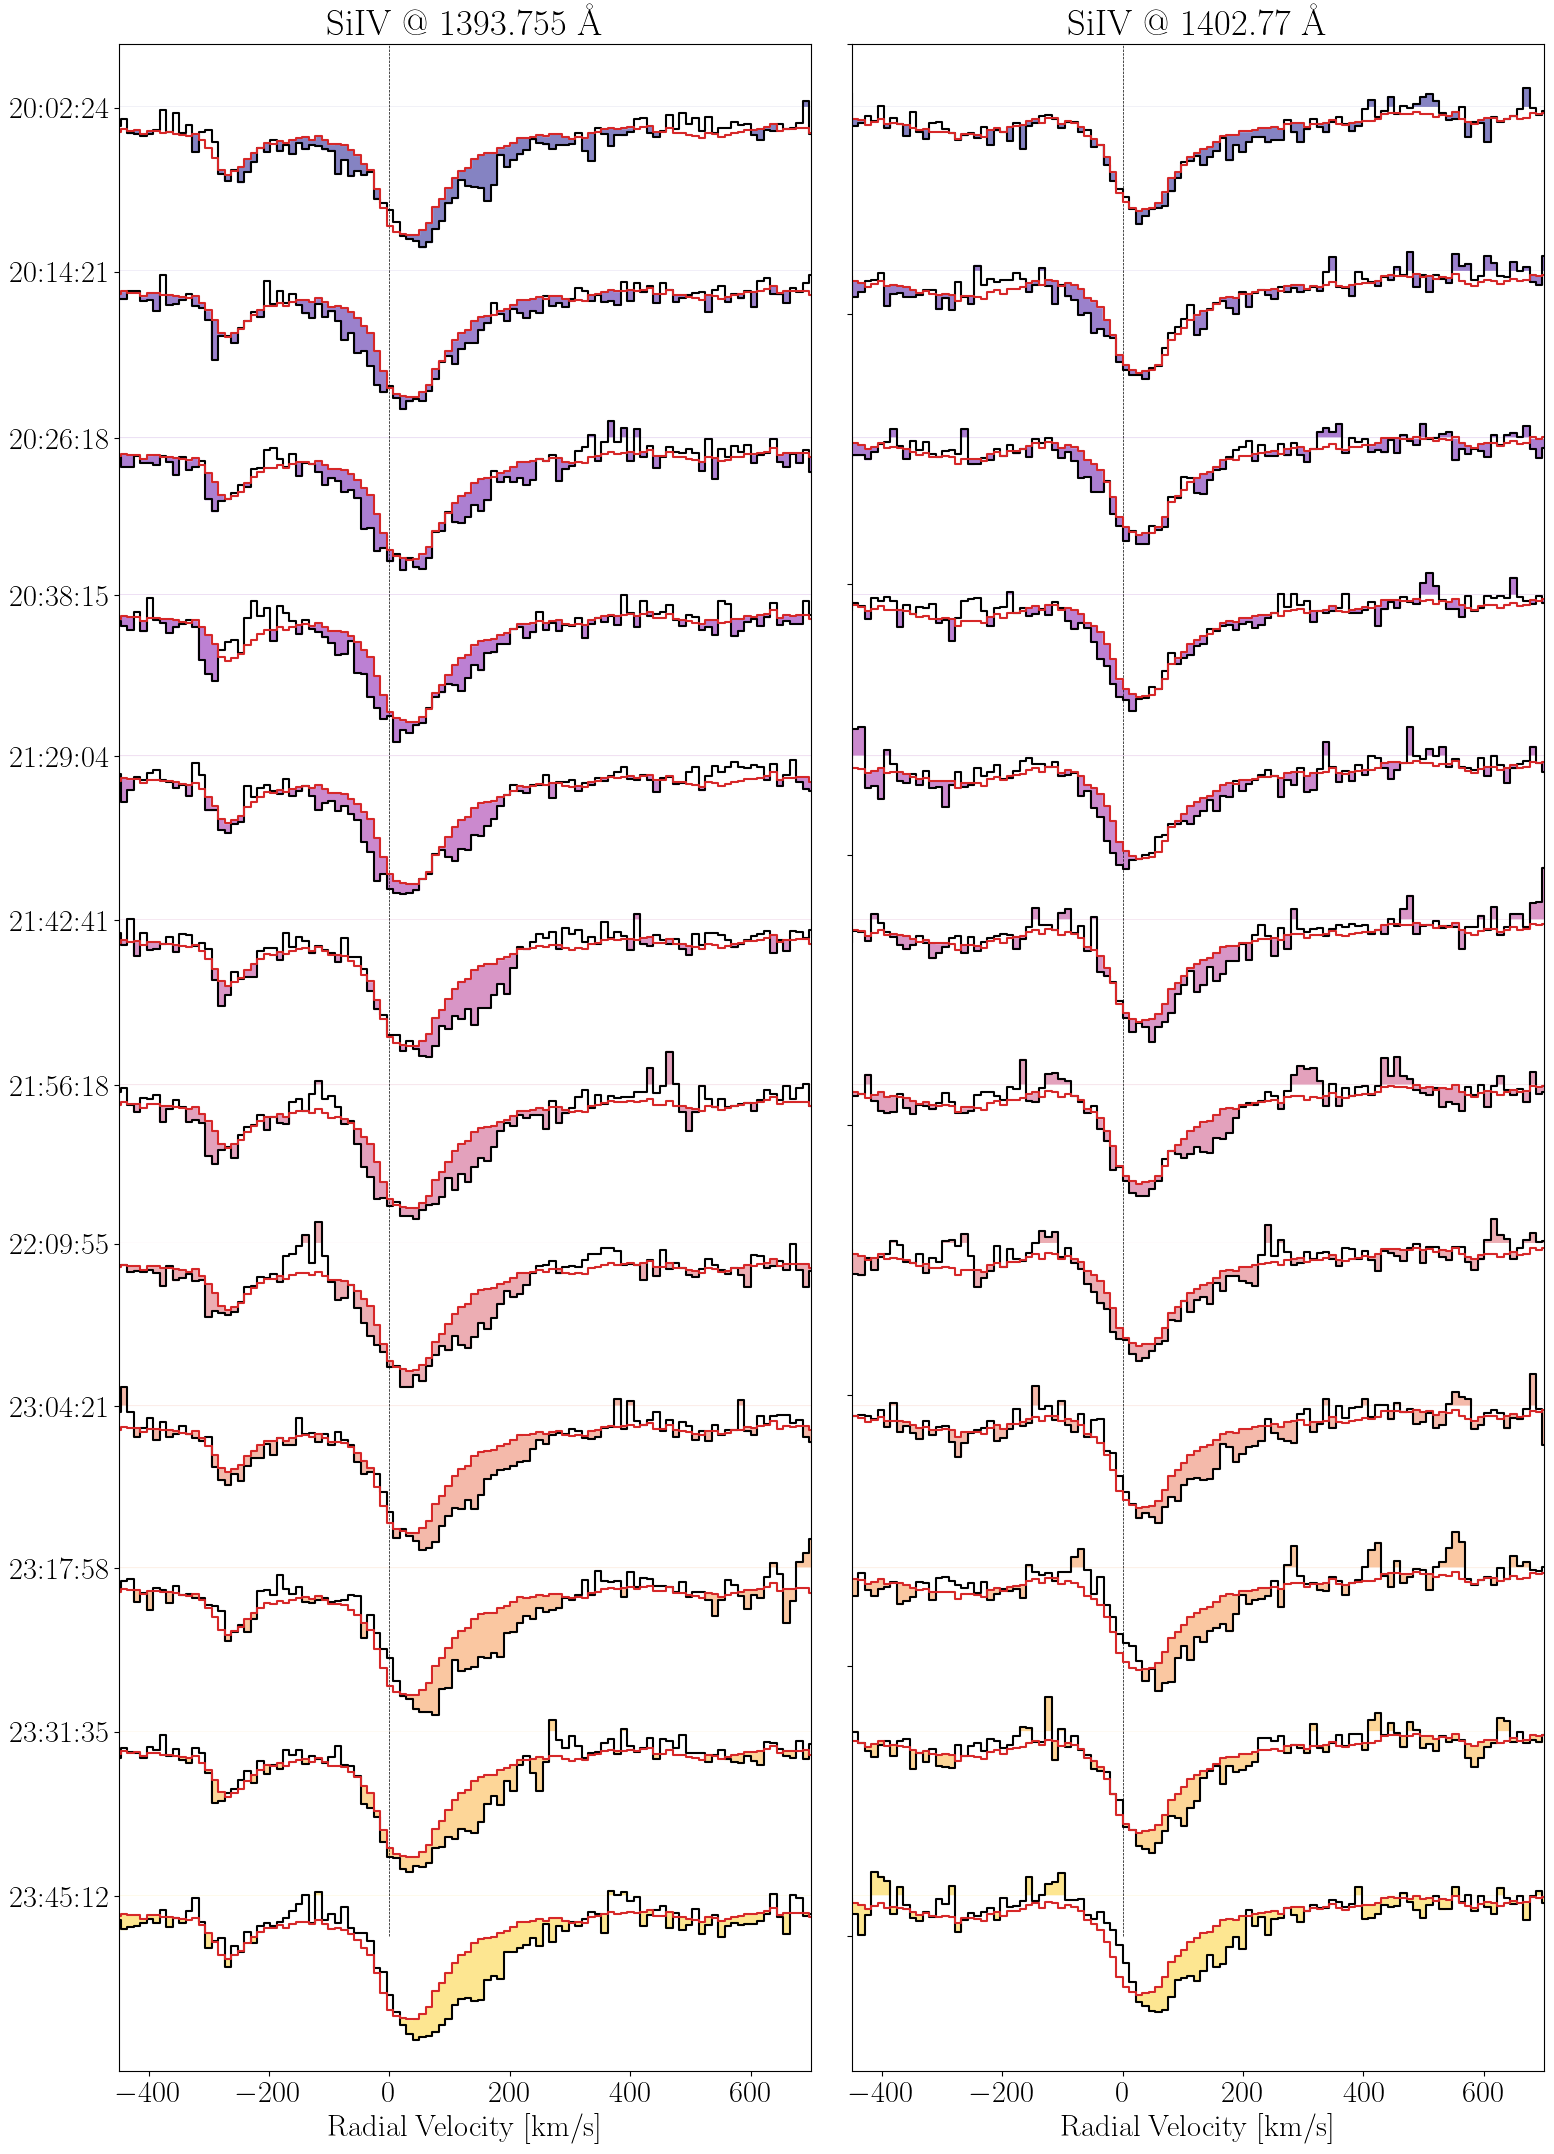

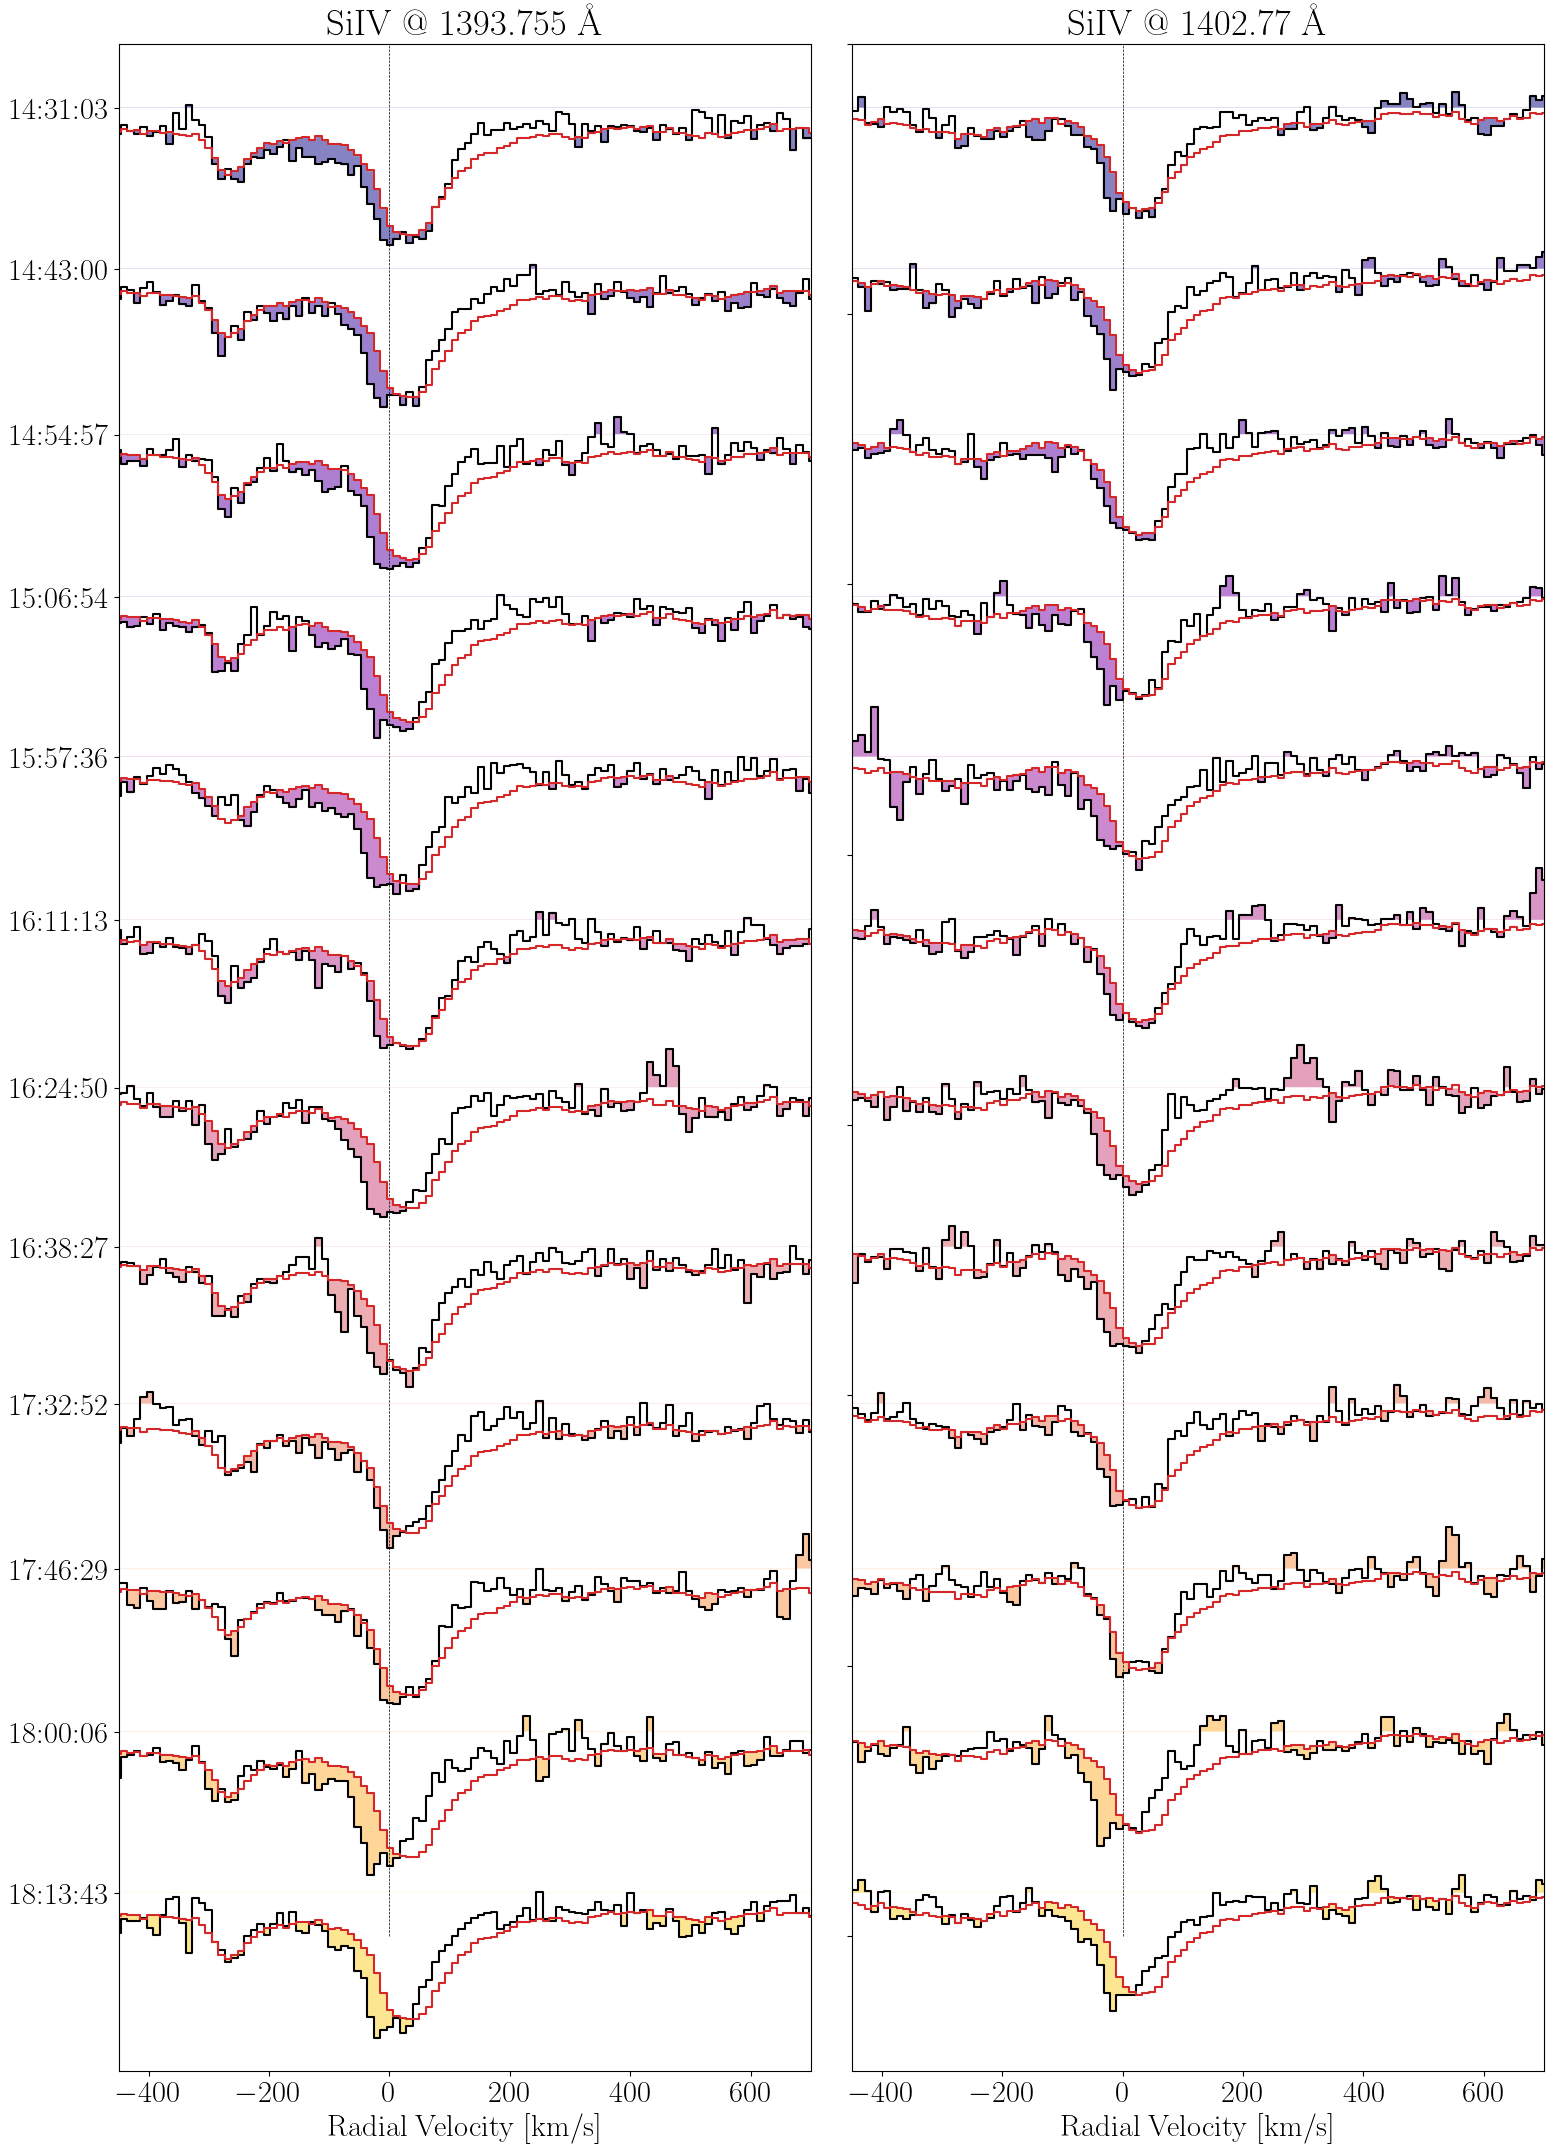

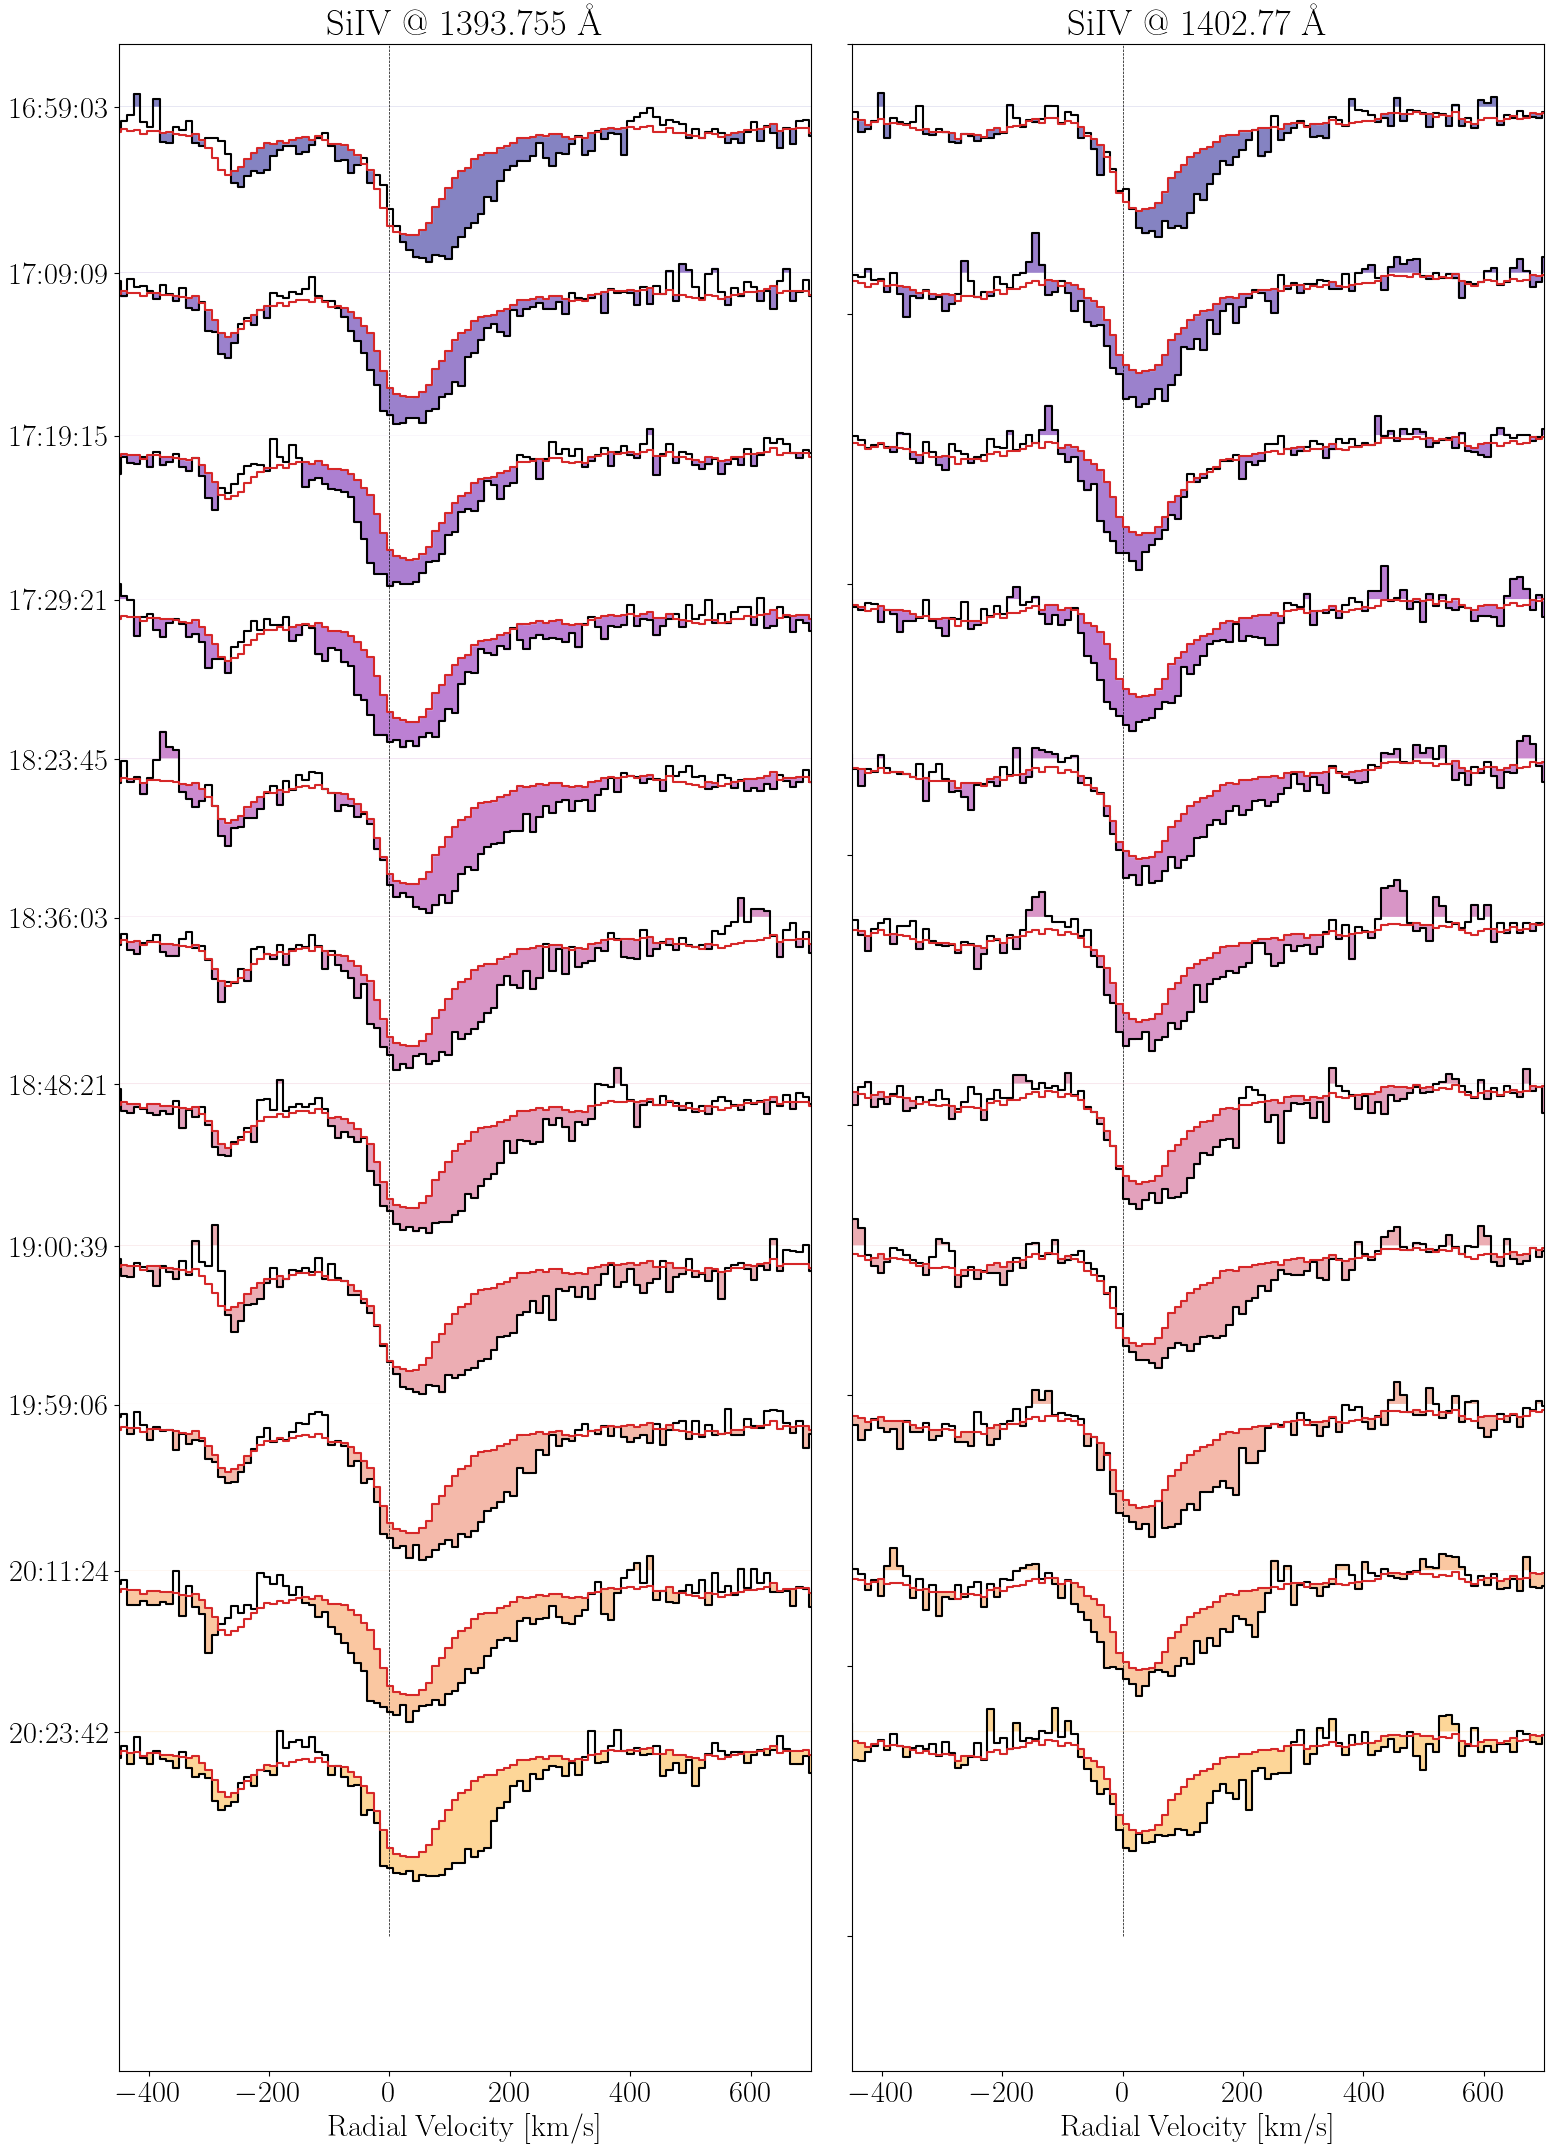

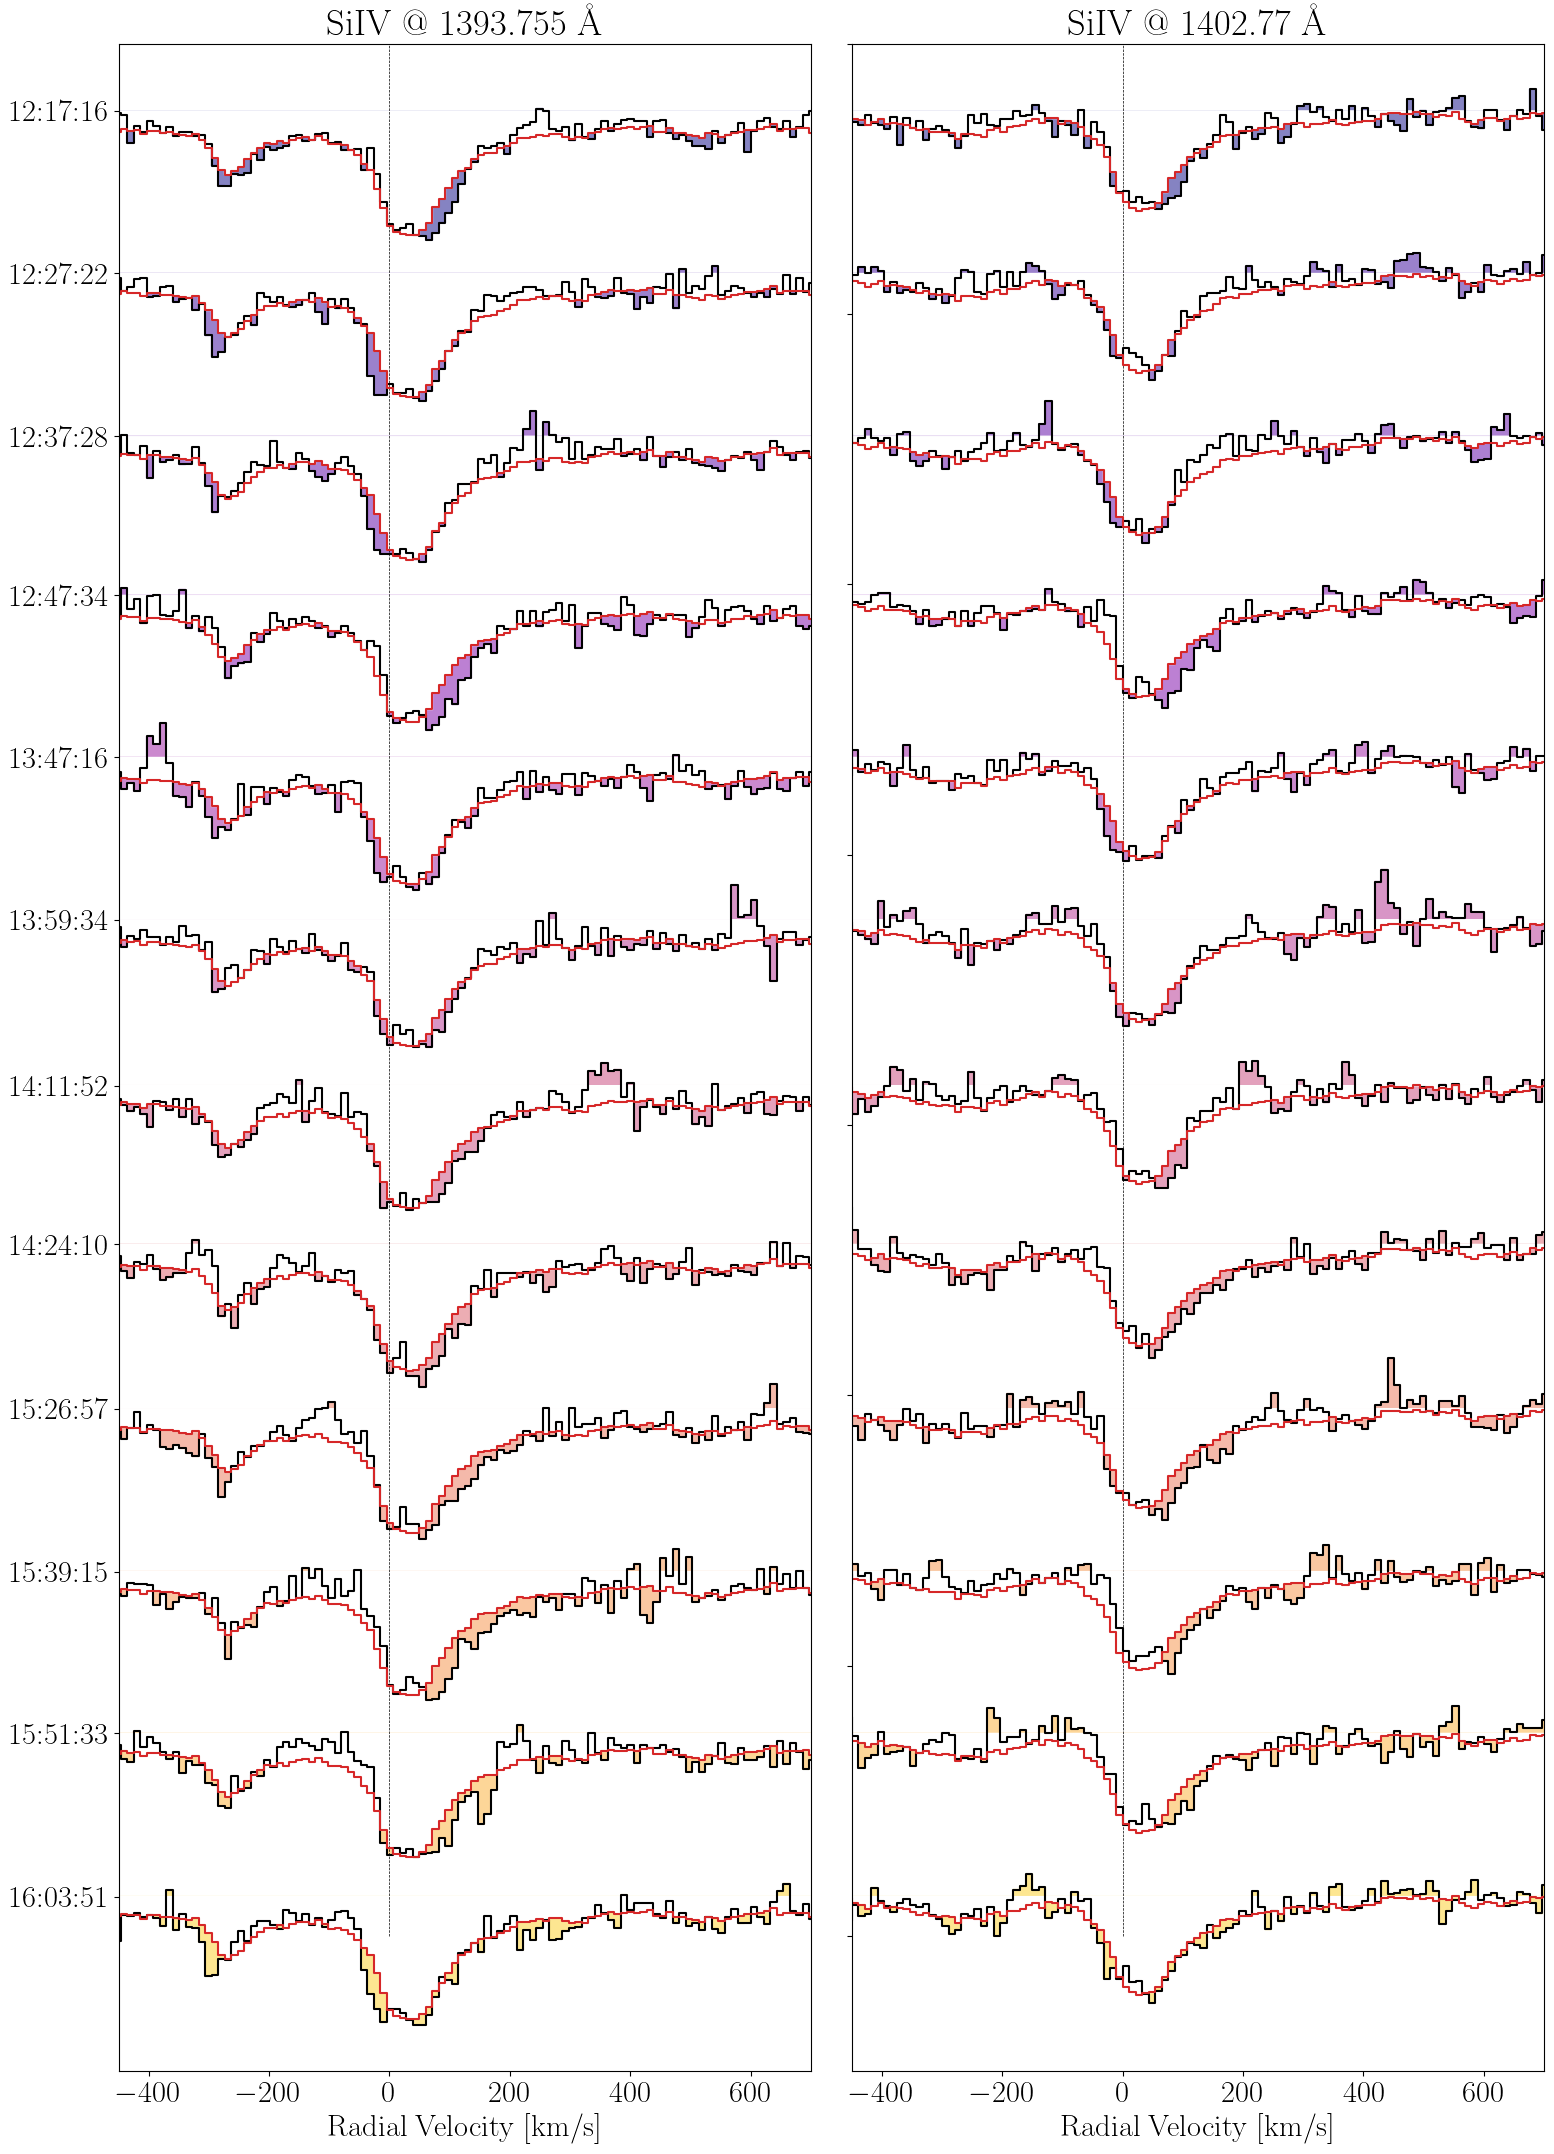

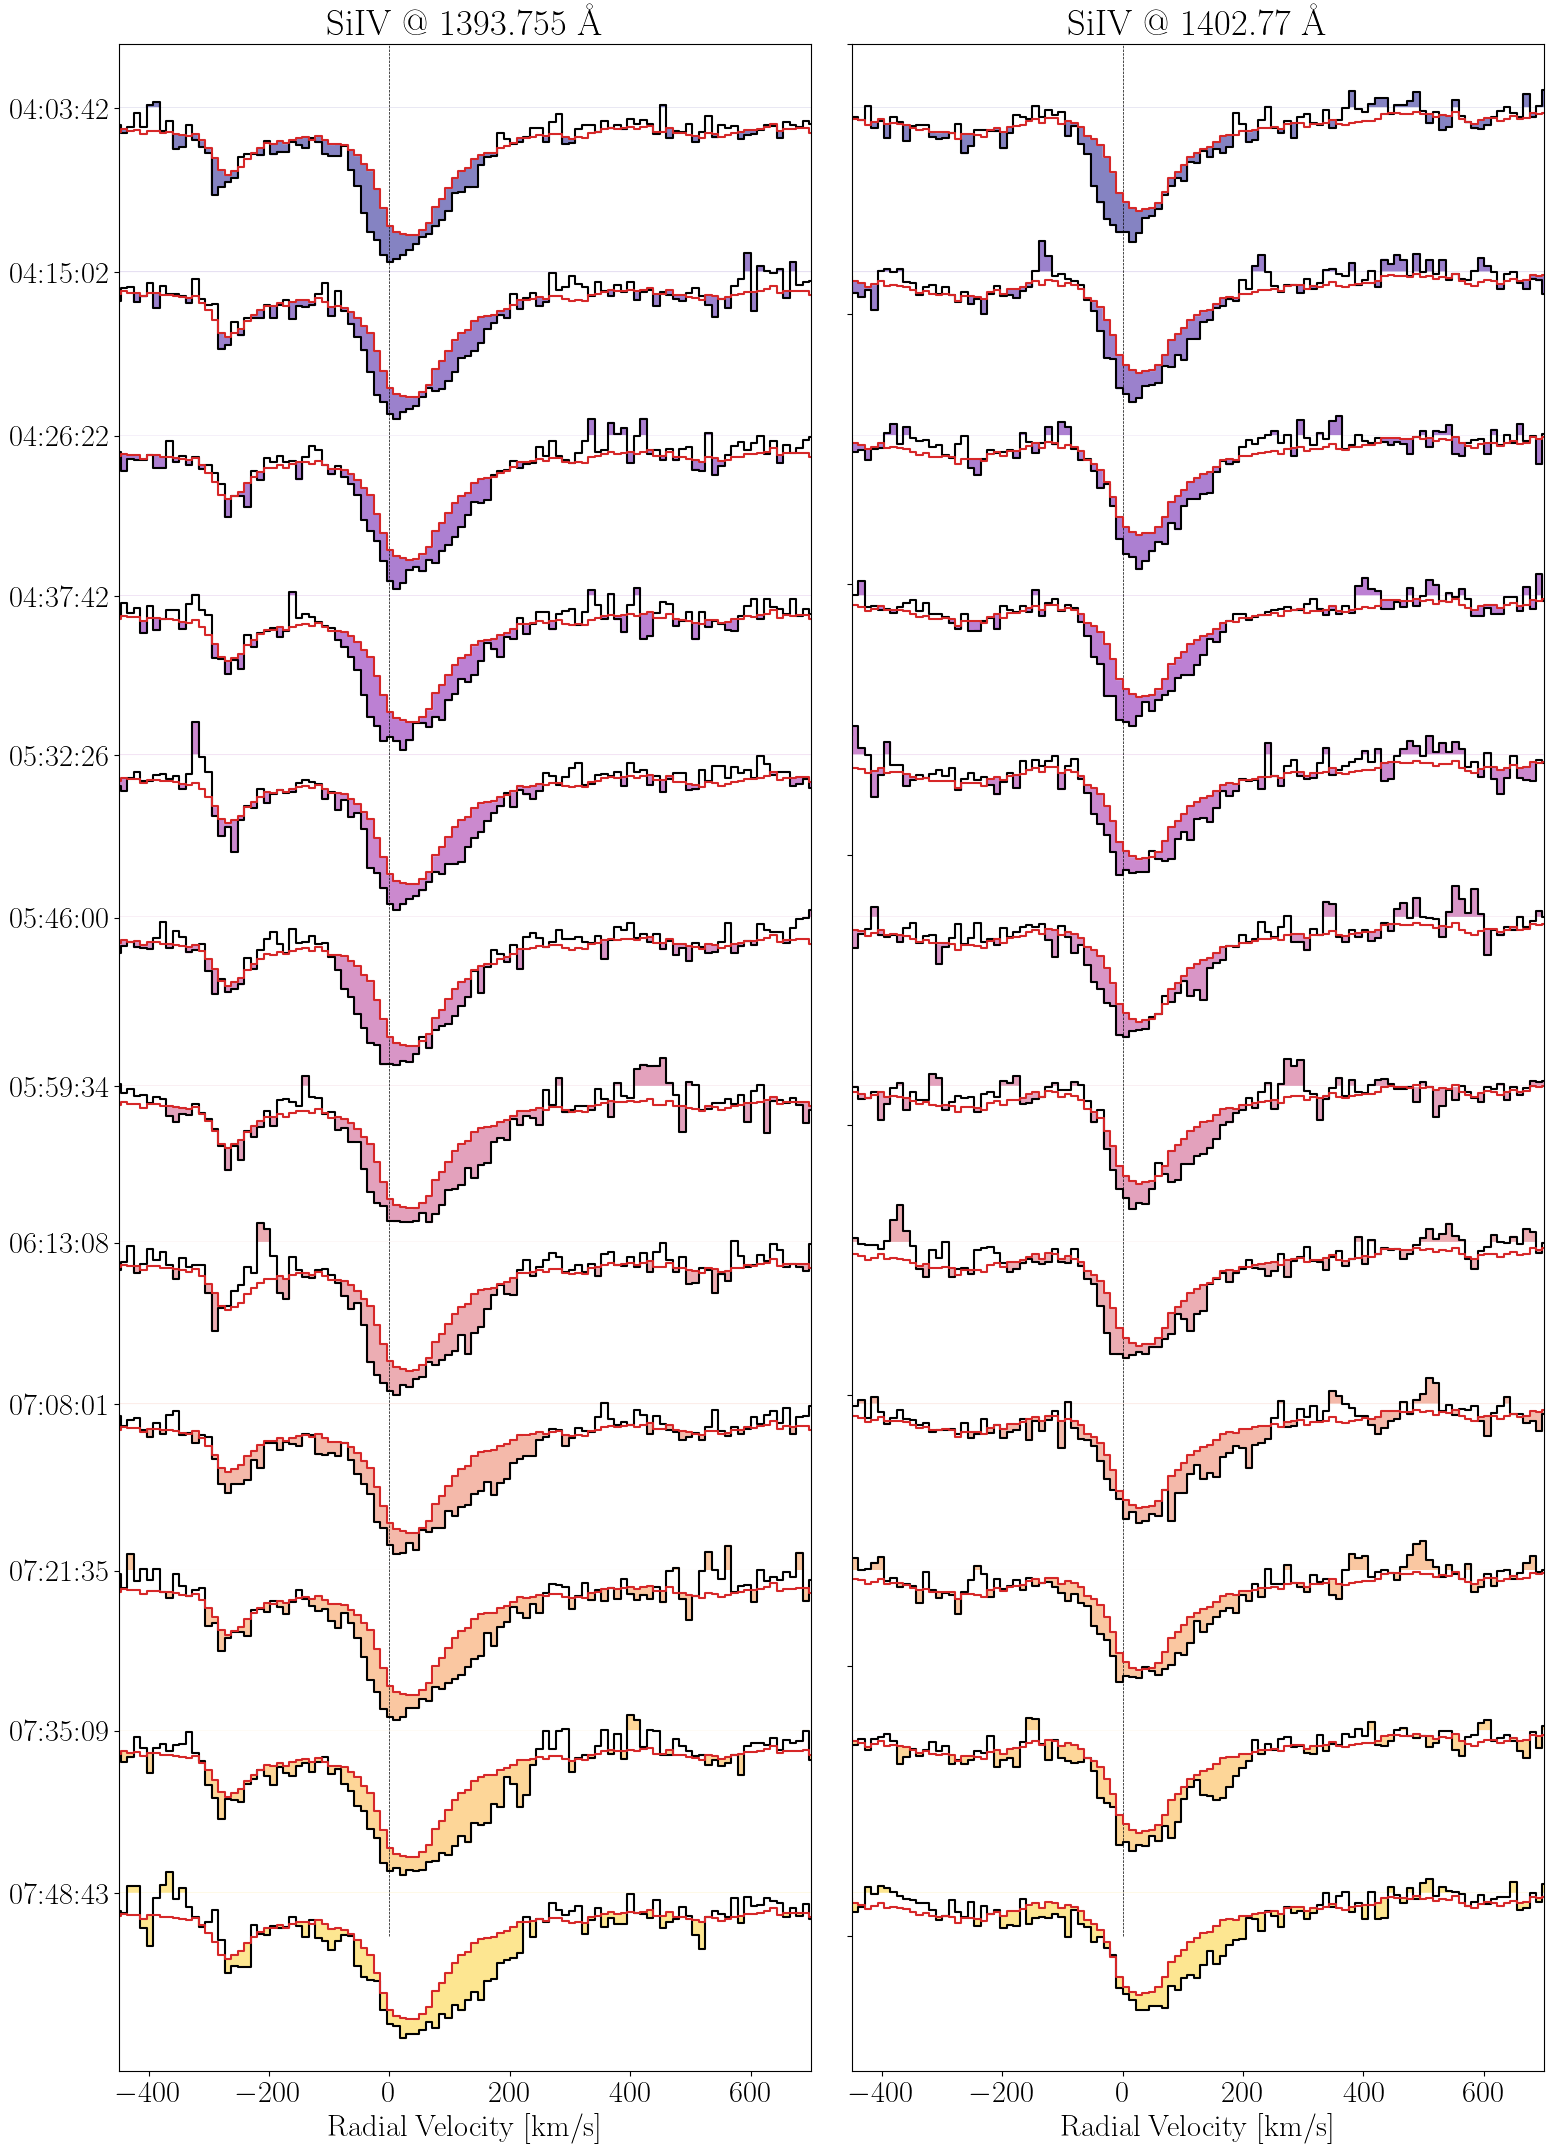

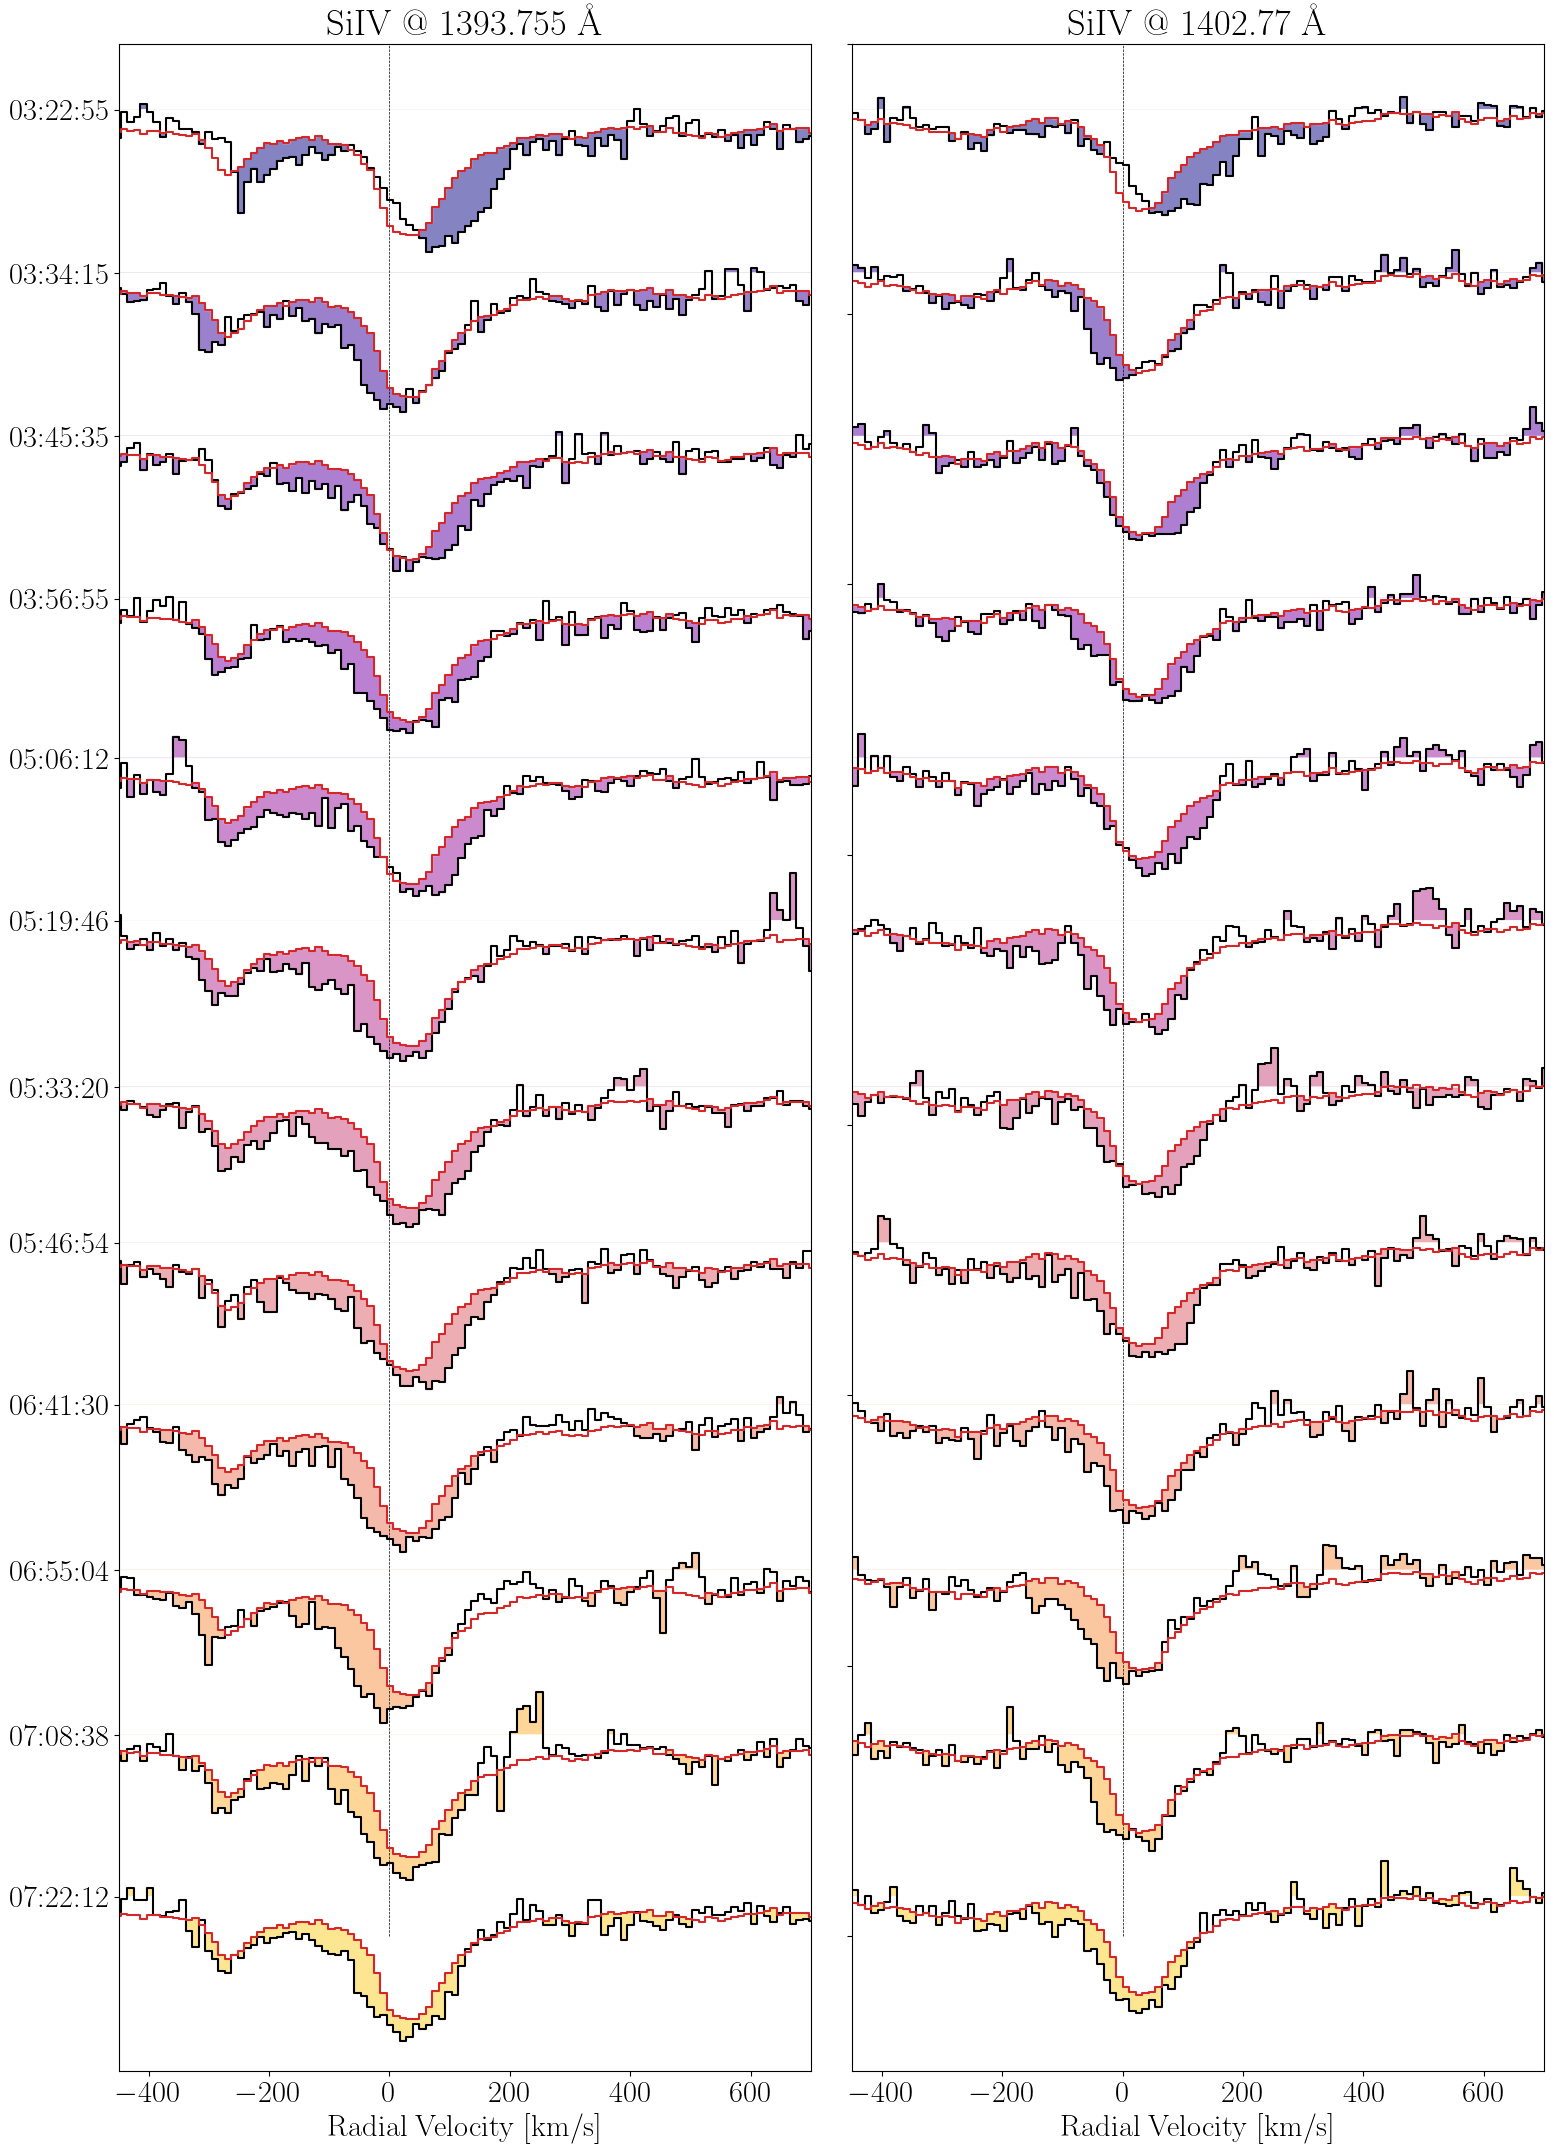

In [5]:
print('Looking at observations done on:')

bin_size = 5 # Only for visualisation. Never used for calculation.

if param["filenames"]["split_files"] == "yes":
    cool=cm.plasma(np.linspace(0.0,0.9,12)) # Create some nice colours for the plot
else:
    cool=cm.plasma(np.linspace(0.0,0.9,3)) # Create some nice colours for the plot

lines = [1393.7550, 1402.7700]

# Find the array element corresponding to n1 and n2 km/s
s1, s2 = c.RegionSelect(rv, n1, n2)

# In this plot we want to compare each observation to the exocomet free spectrum:


# We loop over all the visits given in params.json
for nobs in range(len(DP)):

    # We extract the date so we can put it on the y-axis of the plot
    date = str(DP[nobs][0][3])[:10]
    
    print('\n',date)

    # We initialise lists used for marking the y-axis
    ticks = []
    times = []
    
    if param["filenames"]["split_files"] == "yes":
        fig = plt.figure(figsize=(16.0,22.0))
    else:
        fig = plt.figure(figsize=(14,8.0))
    
    # Run a loop over the number of lines being explored.
    # In this case the 1393.7550 and 1402.7700 lines
    for j in range(2):
        
        if j == 0:
            ax1 = plt.subplot(121) # Subplot on the left showing the 1394 Å line.
            rv = c.Wave2RV(DP[0][0][0],lines[j],20.5)
            rv_bin_1, f_bin_1 = c.BinXY(rv,ECF,bin_size)

            # Plot the vertical line at v = 0 km/s
            plt.plot([0,0],[-3.0e-12,0.5e-12],'--k',lw=0.5)

            # We loop over the each spectrum within a visit
            for i in range(len(DP[nobs])):
                # To space out the spectra in the plot we define an offset
                offset = i*3e-13

                # We bin the data for visualisation purposes
                rv_bin, f_bin = c.BinXY(rv,DP[nobs][i][1],bin_size)

                # We record the tick names
                ticks.append(np.median(DP[nobs][i][1][s1:s2])-offset)
                times.append(str(DP[nobs][i][3])[11:])

                # We plot the spectra
                plt.step(rv_bin,f_bin-offset,color="black",label=str(DP[nobs][i][3])[11:])
                plt.fill_between(rv_bin,f_bin-offset,np.median(DP[nobs][i][1][s1:s2])*np.ones(len(rv_bin_1))-offset,step='pre',color=cool[i],alpha=0.5)
                plt.step(rv_bin_1,f_bin_1-offset,color="tab:red",label=str(DP[nobs][i][3])[11:])
                plt.fill_between(rv_bin_1,f_bin_1-offset,np.median(DP[nobs][i][1][s1:s2])*np.ones(len(rv_bin_1))-offset,step='pre',color="#FFFFFF",alpha=1.0)
            plt.xlabel(r'Radial Velocity [km/s]')
            plt.xlim(-450,700)
            if param["filenames"]["split_files"] == "yes":
                 plt.ylim(-3.25e-12,0.5e-12)
            else:
                 plt.ylim(-5.2e-13,0.4e-12)
            plt.gca().set_yticks(ticks) 
            plt.gca().set_yticklabels(times)

        if j == 1:
            ax2 = plt.subplot(122) # Subplot on the right showing the 1403 Å line.
            rv = c.Wave2RV(DP[0][0][0],lines[j],20.5)
            rv_bin_1, f_bin_1 = c.BinXY(rv,ECF,bin_size)

            # Plot the vertical line at v = 0 km/s
            plt.plot([0,0],[-3.0e-12,0.5e-12],'--k',lw=0.5)

            # We loop over the each spectrum within a visit
            for i in range(len(DP[nobs])):
                # To space out the spectra in the plot we define an offset
                offset = i*3e-13

                # We bin the data for visualisation purposes
                rv_bin, f_bin = c.BinXY(rv,DP[nobs][i][1],bin_size)

                # We record the tick names
                ticks.append(np.median(DP[nobs][i][1][s1:s2])-offset)
                times.append(str(DP[nobs][i][3])[11:])

                # We plot the spectra
                plt.step(rv_bin,f_bin-offset,color="black",label=str(DP[nobs][i][3])[11:])
                plt.fill_between(rv_bin,f_bin-offset,np.median(DP[nobs][i][1][s1:s2])*np.ones(len(rv_bin_1))-offset,step='pre',color=cool[i],alpha=0.5)
                plt.step(rv_bin_1,f_bin_1-offset,color="tab:red",label=str(DP[nobs][i][3])[11:])
                plt.fill_between(rv_bin_1,f_bin_1-offset,np.median(DP[nobs][i][1][s1:s2])*np.ones(len(rv_bin_1))-offset,step='pre',color="#FFFFFF",alpha=1.0)

            plt.xlabel(r'Radial Velocity [km/s]')

            # We remove the tick labels from the right subplot
            ax2.set(yticklabels=[]) 
            ax2.set(ylabel=None)     

            plt.xlabel(r'Radial Velocity [km/s]')
            plt.xlim(-450,700)
            if param["filenames"]["split_files"] == "yes":
                 plt.ylim(-3.25e-12,0.5e-12)
            else:
                 plt.ylim(-5.2e-13,0.4e-12)
    ax1.title.set_text('SiIV @ '+str(Line1)+' \AA')
    ax2.title.set_text('SiIV @ '+str(Line2)+' \AA')
    fig.tight_layout()
    plt.savefig(home+'/plots/comparison/'+date+'.pdf', bbox_inches='tight', pad_inches=0.1,dpi=300)

█▓▒▒░░░ Visit: 5 ░░░▒▒▓█
[145.39493957  12.78415421  35.          10.        ] [18.95107212 13.15925516 35.         10.        ]
[156.04276618  12.92771002  35.          10.        ] [25.40668314 12.96710338 35.         10.        ]
[145.17168331  12.9548034   35.          10.        ] [31.35344776 12.96505329 35.         10.        ]
[148.44067508  12.91822325  35.          10.        ] [18.21625904 13.13060672 35.         10.        ]
[161.07739209  13.00042387  35.          10.        ] [29.34035639 12.9826809  35.         10.        ]
[147.6449342   12.76455253  35.          10.        ] [ 8.79146459 13.18313181 35.         10.        ]
[165.55141958  13.08137566  35.          10.        ] [19.21972397 12.97050209 35.         10.        ]
[164.96093532  13.04286028  35.          10.        ] [22.83385216 13.06401077 35.         10.        ]
[189.25330112  13.12300692  35.          10.        ] [27.4121147  12.89280365 35.         10.        ]
[166.88051056  13.10897505  35.        

/usr/lib/python3.10/site-packages/matplotlib/ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


[130.          12.67207056  35.          10.        ] [19.15181156 13.42065166 35.         10.        ]
[131.08805324  13.08747371  35.          10.        ] [43.20899649 13.1997804  35.         10.        ]
[130.          13.11007084  35.          10.        ] [50.         13.09275711 35.         10.        ]
[141.44288822  13.08952672  35.          10.        ] [27.07231019 13.30588484 35.         10.        ]
[149.60595337  13.09705916  35.          10.        ] [25.26841277 13.1379328  35.         10.        ]
[168.26849623  12.94828978  20.           9.98      ] [15.57583246 13.17255197 35.         10.        ]
[159.93601064  13.21140704  35.          10.        ] [50.         13.0239324  32.37499087  9.999886  ]
[155.82032626  12.95569535  20.00000002   9.98      ] [24.31831033 13.09171969 21.50498326  9.99999776]
[179.79620227  13.18887721  35.          10.        ] [24.27734705 12.93554372 35.         10.        ]
[143.34344268  13.07459882  35.          10.        ] [12.327692

/usr/lib/python3.10/site-packages/matplotlib/ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


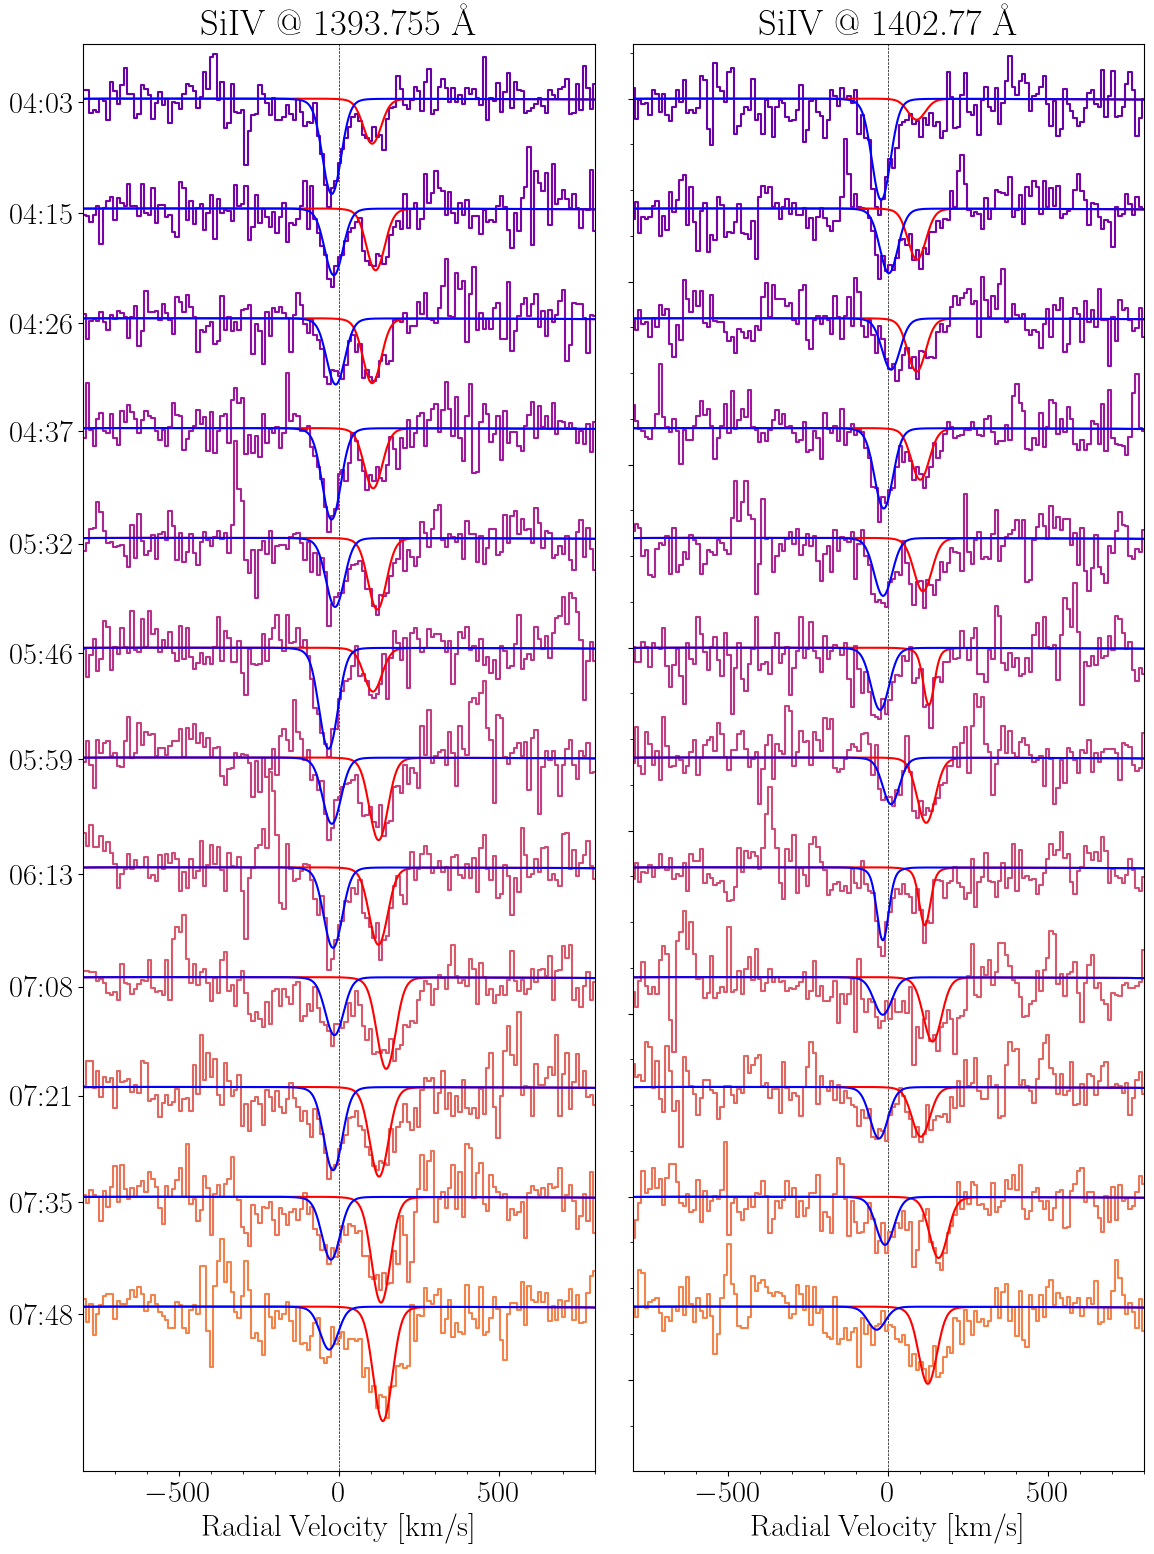

In [13]:
from scipy.optimize import curve_fit

bin_size = 5

if param["filenames"]["split_files"] == "yes":
    cols=cm.plasma(np.linspace(0.2,0.7,12)) # Create some nice colours for the plot
    v_comp_combined = np.zeros(shape=(len(DP), 24))
    N_combined = np.zeros(shape=(len(DP), 24))
    v_turb_combined = np.zeros(shape=(len(DP), 24))
    temp_combined = np.zeros(shape=(len(DP), 24))

    v_comp_err_combined = np.zeros(shape=(len(DP), 24))
    N_err_combined = np.zeros(shape=(len(DP), 24))
    v_turb_err_combined = np.zeros(shape=(len(DP), 24))
    temp_err_combined = np.zeros(shape=(len(DP), 24))

    # We initialise the arrays.
    v_comp = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    N = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    v_turb = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    temp = np.zeros(shape=(len(DP),2, len(DP[nobs])))

    v_comp2 = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    N2 = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    v_turb2 = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    temp2 = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    
    v_comp_err = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    N_err = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    v_turb_err = np.zeros(shape=(len(DP),2, len(DP[nobs])))
    temp_err = np.zeros(shape=(len(DP),2, len(DP[nobs])))

    diffg = np.zeros(shape=(len(DP),2, len(DP[nobs])))
            
else:
    cols=cm.plasma(np.linspace(0.0,0.7,3)) # Create some nice colours for the plot
    v_comp_combined = np.zeros(shape=(len(DP), 6))
    N_combined = np.zeros(shape=(len(DP), 6))
    v_turb_combined = np.zeros(shape=(len(DP), 6))
    temp_combined = np.zeros(shape=(len(DP), 6))

    v_comp_err_combined = np.zeros(shape=(len(DP), 6))
    N_err_combined = np.zeros(shape=(len(DP), 6))
    v_turb_err_combined = np.zeros(shape=(len(DP), 6))
    temp_err_combined = np.zeros(shape=(len(DP), 6))


# We list here the lines we wish to study
lines = [1393.7550, 1402.7700]

# Here we list the RV range we wish to model. These numbers must be symetric
#eg. they must have the same distance away from 0 km/s.
g1 = -1000
g2 = 1000

# len(DP) --> number of visits with multiple observations
# 2 --> Number of lines being studied (2 because we are looking at a doublet)
# len(DP[nobs]) --> number of orbits within a visit




# Run a loop over the number of visits

for nobs in range(len(DP)):
    
    if nobs == 5:

        print("█▓▒▒░░░ Visit:",nobs,"░░░▒▒▓█")

        w = DP[nobs][0][0]
        
        if param["filenames"]["split_files"] == "yes":
            #fig = plt.figure(figsize=(16.0,22.0))
            fig = plt.figure(figsize=(12.0,16.0))
        else:
            fig = plt.figure(figsize=(14,8.0))
        ax1 = plt.subplot(121)
        ax2 = plt.subplot(122)

        ax1.plot([0,0],[-3.2e-12,0.5e-12],'--k',lw=0.5)
        ax2.plot([0,0],[-3.2e-12,0.5e-12],'--k',lw=0.5)

        date = str(DP[nobs][0][3])[:10]

        # The spectrum we are comparing to

        #ax1.text(-650,-1.3e-13,date)
        #ax2.text(-650,-1.3e-13,date)

        #ax1.text(-650,-4.0e-13,date)
        #ax2.text(-650,-4.0e-13,date)
        
        ticks = []
        times = []

        # Select the region which will be used for fitting
        gg1, gg2 = c.RegionSelect(rv, g1, g2)

        # Choose the exocomet free spectrum as a comparison
        rv_bin1, f_bin1 = c.BinXY(rv,ECF,bin_size)


        # Run a loop over the number of lines being explored.
        # In this case the 1393.7550 and 1402.7700 lines
        for j in range(2):

            # Convert to RV space
            rv = c.Wave2RV(w,lines[j],20.5)

            # Note the region user for normalisation
            e1, e2 = c.RegionSelect(rv, n1, n2)

            # Bin the data for visualisation purposes
            rv_bin, f_bin = c.BinXY(rv,DP[nobs][0][1],bin_size)

            # Select the region which will be used for fitting
            gg1, gg2 = c.RegionSelect(rv, g1, g2)

            # Run a loop over each exposure
            for i in range(len(DP[nobs])):

                # We want to separaet the spectra vertically and thus define an offset
                offset = i*1.2e-13#/ 2.5e-13

                # Next spectrum to compare to
                f = DP[nobs][i][1]
                rv_bin, f_bin = c.BinXY(rv,f,bin_size)

                # Calculate the difference between the spectra using the exocomet free spectrum
                diffg = (f-ECF)[gg1:gg2]

                # Calculate the uncestainty on the difference
                diff_err = (np.sqrt(DP[nobs][i][2]**2+ECF_err**2))[gg1:gg2]

                # Define the rv region used for fitting
                w_c = w[gg1:gg2]
                rv_c = c.Wave2RV(w_c,lines[j],20.5)

                try:                   
                    if j == 0:
                        # Create the ticks for the y-axis
                        ticks.append(np.median(ECF[e1:e2]-f[e1:e2])-offset)
                        times.append(str(DP[nobs][i][3])[11:16])

                        # Fit the data. p0 are the initial parameters.
                        # [rv_of_feature,log(N),microturbulece,Temperature]
                        # We keep T=10K to avoid degeneracies
                        
                        # nobs = 4
                        #popt,pcov = curve_fit(m.absorptionSiIV_1,w_c,(diffg/np.median(ECF[e1:e2]))+1.0,\
                        #                      p0=[100,13.5,30,9.99],bounds=([-300, 11, 1, 9.98], [300, 15, 80, 10]), maxfev = 800)
                        popt,pcov = curve_fit(m.absorptionSiIV_1,w_c,(diffg/np.median(ECF[e1:e2]))+1.0,\
                                              p0=[170,13.,20,9.99],bounds=([130, 11, 20, 9.98],[500, 15, 35, 10]))
                        popt2,pcov2 = curve_fit(m.absorptionSiIV_1,w_c,(diffg/np.median(ECF[e1:e2]))+1.0,\
                                              p0=[20,13.,20,9.99],bounds=([5, 11, 20, 9.98],[50, 15, 35, 10]))
                        ax1.step(rv_bin,f_bin-f_bin1+np.median(ECF[e1:e2]-f[e1:e2])*np.ones(len(rv_bin))-offset,color=cols[i],label=times[i])
                        
                        ax1.plot(rv_c,(m.absorptionSiIV_1(w_c,*popt)-1.0)*np.median(f[e1:e2])-offset,'-r')
                        ax1.plot(rv_c,(m.absorptionSiIV_1(w_c,*popt2)-1.0)*np.median(f[e1:e2])-offset,'-b')

                    if j == 1:
                        popt,pcov = curve_fit(m.absorptionSiIV_2,w_c,(diffg/np.median(ECF[e1:e2]))+1.0,\
                                              p0=[170,13.,20,9.99],bounds=([130, 11, 20, 9.98],[500, 15, 35, 10]))
                        popt2,pcov2 = curve_fit(m.absorptionSiIV_2,w_c,(diffg/np.median(ECF[e1:e2]))+1.0,\
                                              p0=[20,13.,20,9.99],bounds=([5, 11, 20, 9.98],[50, 15, 35, 10]))
                        ax2.step(rv_bin,f_bin-f_bin1+np.median(ECF[e1:e2]-f[e1:e2])*np.ones(len(rv_bin))-offset,color=cols[i],label=times[i])
                        ax2.plot(rv_c,(m.absorptionSiIV_2(w_c,*popt)-1.0)*np.median(f[e1:e2])-offset,'-r')
                        ax2.plot(rv_c,(m.absorptionSiIV_2(w_c,*popt2)-1.0)*np.median(f[e1:e2])-offset,'-b')

                    print(popt,popt2)

                    # Calculate the uncertainties on the parameters
                    perr = np.sqrt(np.diag(pcov))

                    # Store the fit parameters
                    v_comp[nobs][j][i] = popt[0]
                    N[nobs][j][i] = popt[1]
                    v_turb[nobs][j][i] = popt[2]
                    temp[nobs][j][i] = popt[3]

                    v_comp2[nobs][j][i] = popt[0]
                    N2[nobs][j][i] = popt[1]
                    v_turb2[nobs][j][i] = popt[2]
                    temp2[nobs][j][i] = popt[3]
                    
                    # Store the uncertainties on the parameters
                    v_comp_err[nobs][j][i] = perr[0]
                    N_err[nobs][j][i] = perr[1]
                    v_turb_err[nobs][j][i] = perr[2]
                    temp_err[nobs][j][i] = perr[3] 

                except RuntimeError:

                    print("Not able to fit")

            ax1.title.set_text('SiIV @ '+str(Line1)+' \AA')
            ax1.set_xlim(-800,800)
            if param["filenames"]["split_files"] == "yes":
                ax1.set_ylim(-1.5e-12,6.0e-14)
            else:
                ax1.set_ylim(-4.5e-13,6.0e-14)
                #ax1.set_ylim(-2e-13,6.0e-14)
            ax1.set_xlabel(r'Radial Velocity [km/s]')
            ax1.set_yticks(ticks) 
            ax1.set_yticklabels(times)
            ax1.xaxis.get_ticklocs(minor=True)
            ax1.minorticks_on()

            ax2.title.set_text('SiIV @ '+str(Line2)+' \AA')
            ax2.set_xlim(-800,800)
            if param["filenames"]["split_files"] == "yes":
                ax2.set_ylim(-1.5e-12,6.0e-14)
            else:
                ax2.set_ylim(-4.5e-13,6.0e-14)
                #ax2.set_ylim(-2e-13,6.0e-14)
            ax2.set_xlabel(r'Radial Velocity [km/s]')
            ax2.set(yticklabels=[]) 
            ax2.set(ylabel=None)  

            ax2.xaxis.get_ticklocs(minor=True)
            ax2.minorticks_on()
            
            
            #ax1.legend(loc='lower left', numpoints=1)
            #ax2.legend(loc='lower left', numpoints=1)
            
            fig.tight_layout()
            plt.savefig(home+'/plots/fits/'+date+'_exocomets.pdf', bbox_inches='tight', pad_inches=0.1,dpi=300)

        v_comp_combined[nobs]=np.concatenate(v_comp[nobs])
        N_combined[nobs]=np.concatenate(N[nobs])
        v_turb_combined[nobs]=np.concatenate(v_turb[nobs])
        temp_combined[nobs]=np.concatenate(temp[nobs])

        v_comp_err_combined[nobs]=np.concatenate(v_comp_err[nobs])
        N_err_combined[nobs]=np.concatenate(N_err[nobs])
        v_turb_err_combined[nobs]=np.concatenate(v_turb_err[nobs])
        temp_err_combined[nobs]=np.concatenate(temp_err[nobs])